# 半導体セクター比較

材料メーカー vs. 製造装置

In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

In [2]:
def weekly_chart(ticker: yf.Ticker) -> pd.DataFrame:
    df = ticker.history(interval='1d', period='1y')

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    mpf.plot(
        df,
        type='candle',
        style='yahoo',
        mav=(13, 26, 52),
        volume=False,
        datetime_format='%Y-%m-%d',
        xrotation=0,
        ax=ax,
    )
    ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' % (ticker.info['longName'], ticker.info['symbol']))
    ax.grid()

    return df

## 東京エレクトロン

                                   Open          High           Low  \
Date                                                                  
2023-11-13 00:00:00+09:00  22745.547783  22957.248769  22135.061220   
2023-11-14 00:00:00+09:00  22489.536998  22972.018308  22415.687817   
2023-11-15 00:00:00+09:00  23434.806105  23872.977900  23218.181847   
2023-11-16 00:00:00+09:00  23680.971191  23833.592835  23405.267577   
2023-11-17 00:00:00+09:00  23385.573319  23754.819213  23100.023161   

                                  Close   Volume  Dividends  Stock Splits  
Date                                                                       
2023-11-13 00:00:00+09:00  22228.603516  4329100        0.0           0.0  
2023-11-14 00:00:00+09:00  22873.552734  3450100        0.0           0.0  
2023-11-15 00:00:00+09:00  23744.972656  4810100        0.0           0.0  
2023-11-16 00:00:00+09:00  23720.357422  3407700        0.0           0.0  
2023-11-17 00:00:00+09:00  23744.972656  35388

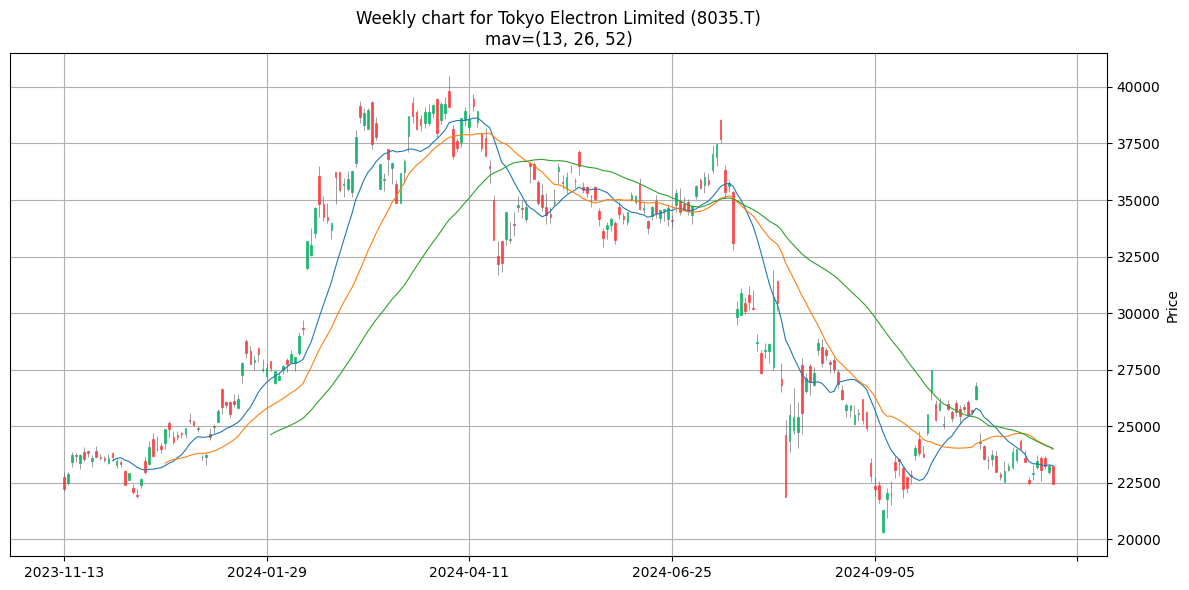

In [3]:
symbol1 = '8035.T' # 東京エレクトロン
ticker1 = yf.Ticker(symbol1)
df1 = weekly_chart(ticker1)
print(df1.head())
print(df1.tail())
plt.tight_layout()
plt.savefig('weekly_chart_8035.png')
plt.show()

## 信越化学

                                  Open         High          Low        Close  \
Date                                                                            
2023-11-13 00:00:00+09:00  4801.844047  4806.763969  4710.333494  4739.853027   
2023-11-14 00:00:00+09:00  4806.763573  4806.763573  4712.301075  4748.708496   
2023-11-15 00:00:00+09:00  4849.074904  4915.985840  4843.170998  4915.985840   
2023-11-16 00:00:00+09:00  4939.601372  5059.647461  4934.681450  5059.647461   
2023-11-17 00:00:00+09:00  5109.830569  5174.773535  5063.583306  5163.949707   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-11-13 00:00:00+09:00  3089300        0.0           0.0  
2023-11-14 00:00:00+09:00  3478500        0.0           0.0  
2023-11-15 00:00:00+09:00  7551900        0.0           0.0  
2023-11-16 00:00:00+09:00  8058800        0.0           0.0  
2023-11-17 00:00:00+09:00  7378200        0.0           0.0 

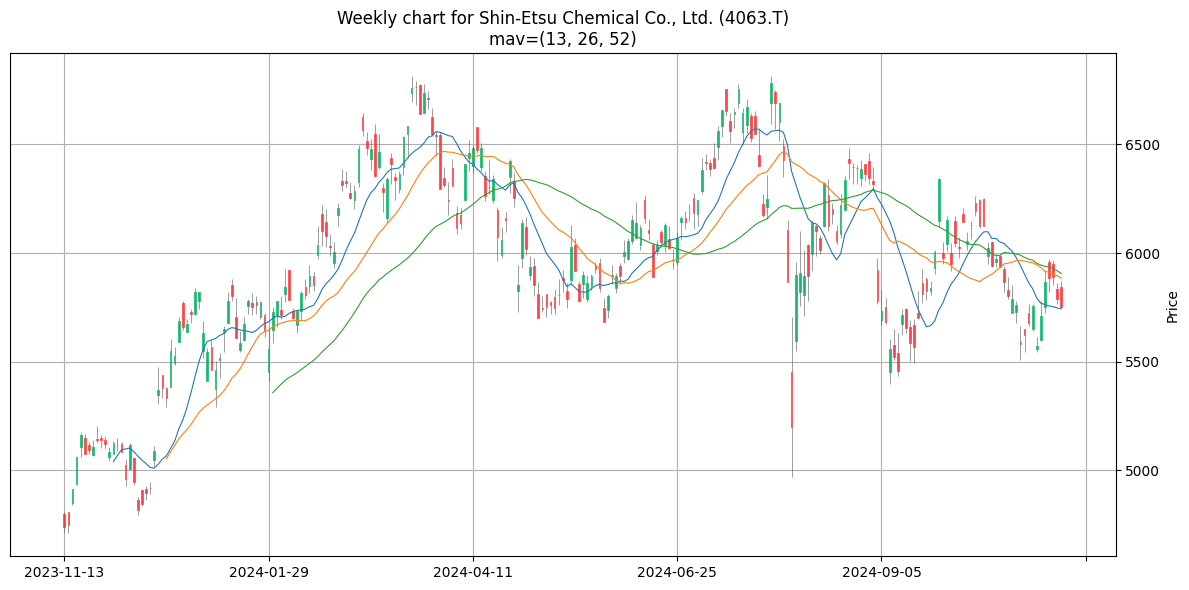

In [4]:
symbol2 = '4063.T' # 信越化学
ticker2 = yf.Ticker(symbol2)
df2 = weekly_chart(ticker2)
print(df2.head())
plt.tight_layout()
plt.savefig('weekly_chart_4063.png')
plt.show()

In [5]:
def change_ratio(ticker, df):
    ser = pd.Series(df['Close'])
    origin = ser.iloc[0]
    return pd.Series([(v - origin) / origin for v in ser], name=ticker.info['symbol'], index=df.index)

In [6]:
series1 = change_ratio(ticker1, df1)
series2 = change_ratio(ticker2, df2)

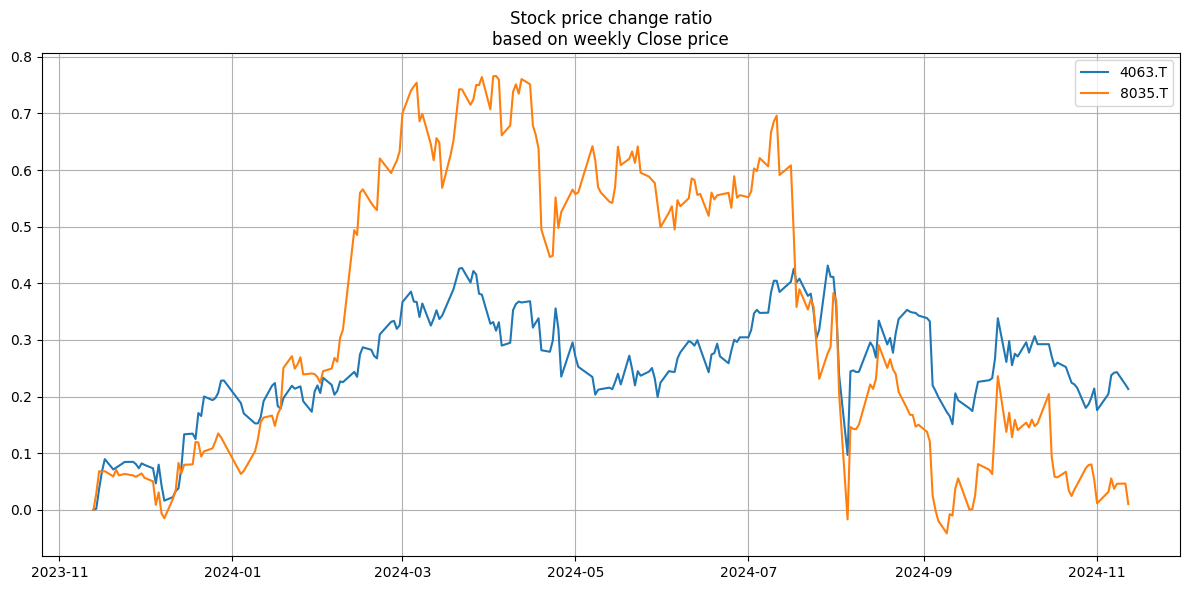

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(series2, label=series2.name)
ax.plot(series1, label=series1.name)

ax.set_title('Stock price change ratio\nbased on weekly Close price')

plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.savefig('weekly_chart_4063_8035.png')

plt.show()